# P2P网络借贷平台数据分析

## 1、摘要

随着现代信息科技的高速发展，基于移动支付、社交网络、搜索引擎和云计算等互联网金融模式正在改变传统金融体系的价值创造和服务方式，其中，Peer-to-Peer（P2P）网络借贷正是一种融合互联网技术的新型金融模式。它绕过银行等传统金融中介，个体与个体间直接进行借贷行为，借贷过程中所需的资料、资金、合同与手续等均依托互联网。本文选取了美国prosper网贷平台2005年~2014年共11w的贷款数据，从业务层面分析该平台的业务特点，并采用数据分析的方法分析借款人、投资人和平台方如何实现自身利益的最大化。
* 通过本次项目分析主要解决下面的问题：采用数据分析的方法分析借款人、投资人和平台方如何实现自身利益的最大化。

## 2、数据来源

本次项目分析数据来自kaggle平台上的prosper数据。

## 3、数据导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from pylab import mpl
plt.style.use('ggplot')

In [2]:
#导入数据
data_P2P = pd.read_csv('C:/Users/79839/jupyter_text/prosperLoanData.csv',encoding = 'gb2312')

In [3]:
#查看数据表
data_P2P.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## 4、数据完整性查看

In [4]:
data_P2P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

    本次项目主要以以下几个特征进行分析

|特征                    |描述                                        |
|:----------------------|:------------------          |
|CreditGrade|Prosper对散标的风险评级|
|BorrowerState|借款人借款地点|
|IncomeRange|借款人收入|
|Term|借款的期数|
|CreditScoreRangeLower/CreditScoreRangeUpper|消费信用最低/最高分|
|BorrowerAPR|借款年化利息|
|ProsperScore|风险评分|
|LoanOriginalAmount|借款人贷款金额|
|EmploymentStatus|借款人的工作状态|
|EmploymentStatusDuration|借款人当前工作状态持续的月数|
|CreditScoreRangeMean|借款人征信数据中的信用评分范围上下限的均值|
|InquiriesLast6Months|前6个月借款人征信数据被查询的次数|
|BankcardUtilization|借款人信用卡已用额度占比|
|DebtToIncomeRatio|借款人负债收入比|
|ProsperPaymentsLessThanOneMonthLate|借款人在Prosper逾期还款在一个月内的次数|
|ProsperPaymentsOneMonthPlusLate|借款人在Prosper逾期还款在一个月以上的次数|
|LoanOriginalAmount|借款人的借款金额|
|ListingCreationDateInHour|借款人发起借款请求的时间段（小时）|
|ProsperScore|Prosper的风险评分|
|DelinquenciesLast7Years|借款人过去七年违约次数|

### 每笔借款的平均投资人数

In [5]:
data_P2P.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


从上表可以看出：最少的借款金额为1000美元，最多的借款金额为35,000美元，中值为6500美元，均值为8337美元。

In [6]:
data_P2P[data_P2P['Investors'].isin([1189])].LoanOriginalAmount #

89166    20000
Name: LoanOriginalAmount, dtype: int64

投资人数最多的一笔借款为20000美元，共有1189个投资人，如果这笔借款被违约成为坏账时，投资人的损失也不大。这是P2P网贷平台的优势之一：将风险分散，使投资人的损失降到最低。

### 5、借款人分布地点

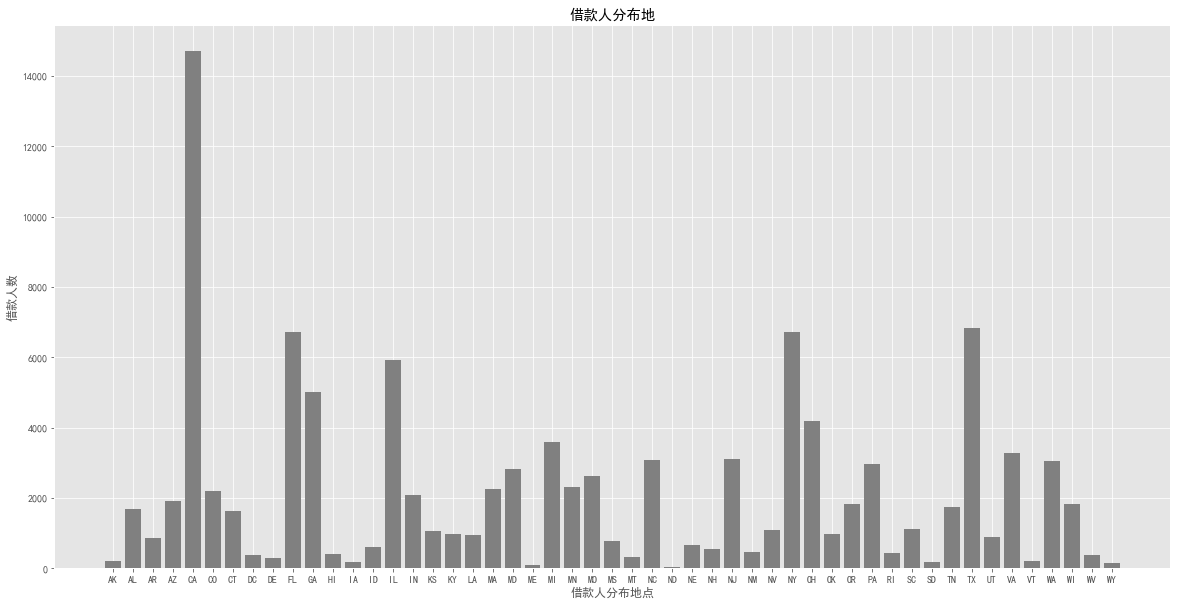

In [7]:
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体,win使用SimHei
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
count_by_ProsperScore=data_P2P.groupby('BorrowerState')['BorrowerState'].count()
plt.subplots(figsize=(20,10))
plt.bar(count_by_ProsperScore.index,count_by_ProsperScore,facecolor='gray')
plt.title('借款人分布地')
plt.xlabel('借款人分布地点')
plt.ylabel('借款人数')
plt.show()

从借款人的分布地可以看出，california借款的人数最多，而prosper总部就位于加利福尼亚州，与实际情况一致。同时，其他几个州也有借款人数超过5000现象，且都是发达城市，因此，不难看出：** prosper网贷平台的用户主要分布美国经济发达的地区。 **

## 5、借款人收入分布

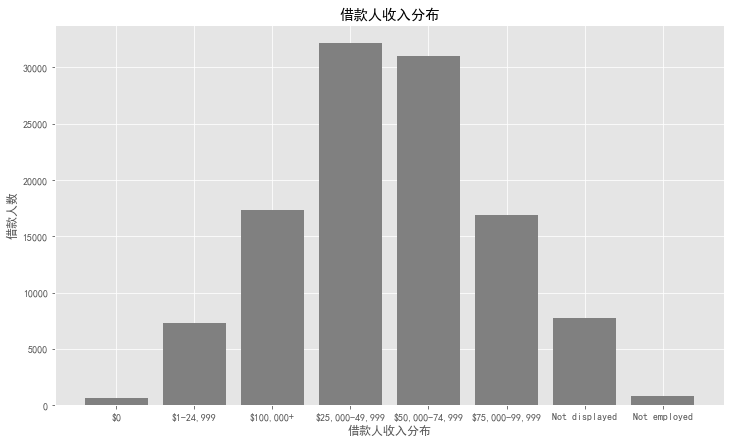

In [8]:
#对借款人收入分布数据进行可视化展示
plt.subplots(figsize=(12,7))
count_by_IncomeRange=data_P2P.groupby('IncomeRange')['IncomeRange'].count()
plt.bar(count_by_IncomeRange.index,count_by_IncomeRange,facecolor='gray')
plt.title('借款人收入分布')
plt.xlabel('借款人收入分布')
plt.ylabel('借款人数')
plt.show()

从借款人的收入情况可以看出：借款人的收入呈正态分布，并且主要分布在$25000~$45000 之间，***反映出在该平台借款人的收入较高***，有利于偿还债务，所以该平台稳定性较高。

### 6、借款人债务收入比

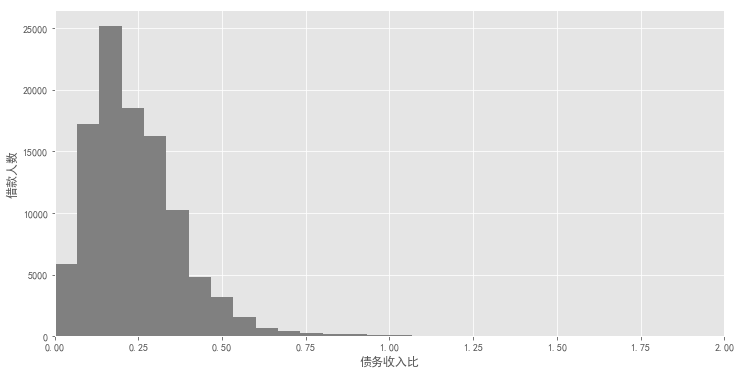

In [9]:
#对借款人债务收入比数据进行可视化展示
data_P2P['DebtToIncomeRatio'].hist(bins=150,facecolor='gray',alpha=1.0,figsize=(12,6))
plt.xlim(0,2)
plt.xlabel('债务收入比')
plt.ylabel('借款人数')
plt.show()

从图中可以看出，借款人的债务收入比呈明显的左偏形态，大部分借款人的债务收入比偏低，***反映出该平台借款人的资金状况良好，平台稳定性较高***。

### 7、贷款人信用卡等级、信用卡积分及信用卡使用状况

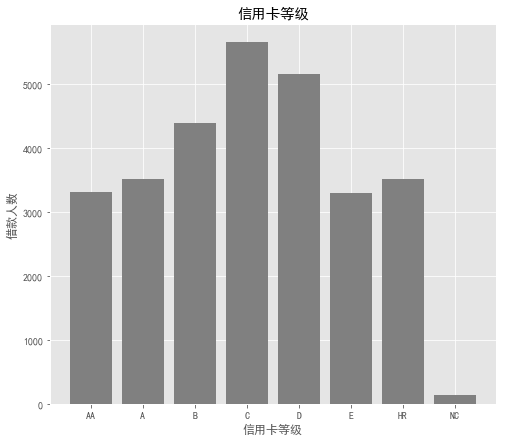

In [10]:
#对借款人信用卡等级数据进行可视化展示
labels = ['AA', 'A', 'B', 'C', 'D','E','HR','NC']
plt.subplots(figsize=(8,7))
data_P2P_CreditGrade=data_P2P.groupby('CreditGrade')['CreditGrade'].count()
plt.bar(range(len(data_P2P_CreditGrade)),data_P2P_CreditGrade, tick_label=labels,facecolor='gray')
plt.xlabel('信用卡等级')
plt.ylabel('借款人数')
plt.title('信用卡等级')
plt.show()

从上图可以看出：该平台借款人的信用卡等级分布趋向于正态分布。

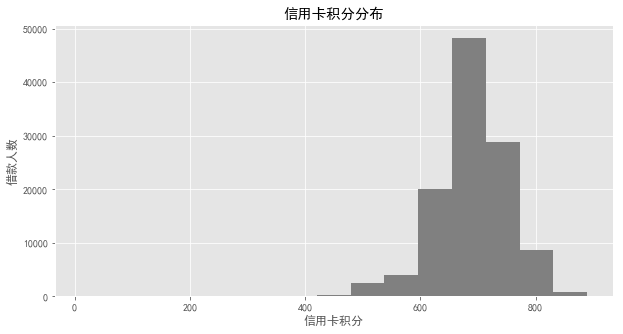

In [11]:
#对借款人信用卡积分数据进行可视化展示
data_P2P['creditscore']=(data_P2P['CreditScoreRangeLower']+ data_P2P['CreditScoreRangeUpper'])/2 #计算借款人的信用卡平均积分
data_P2P['creditscore'].hist(bins=15,facecolor='gray',alpha=1.0,figsize=(10,5))
plt.xlabel('信用卡积分')
plt.ylabel('借款人数')
plt.title('信用卡积分分布')
plt.show()

从上图可以看出：该平台借款人的信用分较高，大部分都在700分以上,这在一定程度上反映出该平台具有较高的稳定性。

In [12]:
#按借款人信用卡使用率对借款人进行分组
bins =[0,0.25,0.5,1,5.95]
labels = ['mild use', 'medium use', 'heavy use', 'super use' ]
data_P2P['Ban']= pd.cut(data_P2P['BankcardUtilization'],bins,labels=labels)

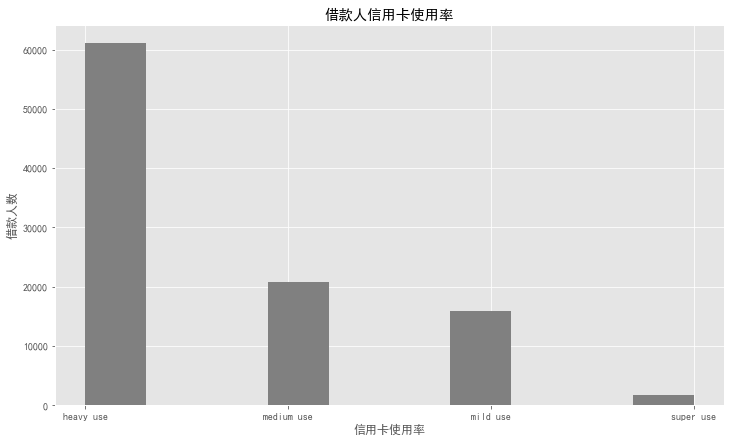

In [13]:
#对借款人信用卡使用率数据进行可视化展示
data_P2P_BankcardUtilization=data_P2P.groupby('Ban')['ListingKey'].count()
data_P2P['Ban'].hist(facecolor='gray',alpha=1.0,figsize=(12,7))
plt.xlabel('信用卡使用率')
plt.ylabel('借款人数')
plt.title('借款人信用卡使用率')
plt.show()

从上图可知：大部分借款人的信用卡状况为***heavy use***,反映出借款人在偿还网贷平台的借款时，还有信用卡需要还，***降低了借款人在网贷平台的还款能力***。

### 8、借款人过去七年违约次数

In [14]:
data_P2P_DelinquenciesLast7Years=data_P2P.groupby('DelinquenciesLast7Years')['ListingKey'].count()

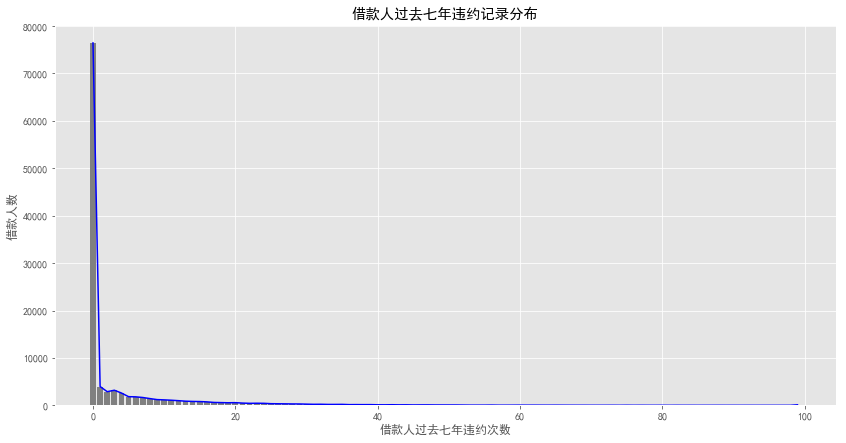

In [15]:
#对借款人过去七年违约次数数据进行可视化展示
plt.subplots(figsize=(14,7))
plt.bar(data_P2P_DelinquenciesLast7Years.index,data_P2P_DelinquenciesLast7Years,facecolor='gray')
plt.plot(data_P2P_DelinquenciesLast7Years.index,data_P2P_DelinquenciesLast7Years,color='b')
plt.xlabel('借款人过去七年违约次数')
plt.ylabel('借款人数')
plt.title('借款人过去七年违约记录分布')
plt.show()

由上图可知：该平台大部分借款人过去7年的违约次数为0，反映出该平台大部分借款人的资质较好，同时，也在一定程度上说明了该部分客户将来违约的可能性较小。

### 9、借款人发起借款时间段

In [16]:
#对时间进行分裂，提取小时数具。
time_split = pd.DataFrame((x.split(' ') for x in data_P2P.ListingCreationDate),index=data_P2P.index,columns=['pickup_date','pickup_time'])

#将分裂后的时间字段与原始数据表合并
data=pd.merge(data_P2P,time_split,right_index=True, left_index=True)

#将合并后数据表中的时间字段更改为时间格式
data['pickup_time']=pd.to_datetime(data['pickup_time'])

#将时间字段设置为数据表的索引字段
data = data.set_index('pickup_time')

#按小时对数据表进行计算汇总
pickup_time=data['ListingKey'].resample('H',how=len)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


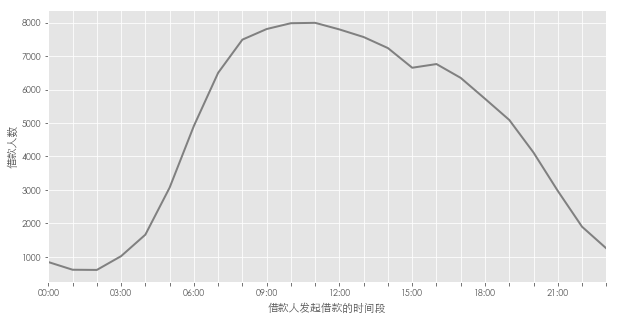

In [17]:
#绘制24小时内借款人借款时间分布图
import numpy as np
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.rc('font', family='STXihei', size=9)
a=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.plot(a,pickup_time,'g-',color='gray',linewidth=2,markeredgewidth=1)
plt.xlabel('借款人发起借款的时间段')
plt.ylabel('借款人数')
plt.xlim(0,23)
plt.xticks(a,('00:00','','','03:00','','','06:00','','','09:00','','','12:00','','','15:00','','','18:00','','','21:00','',''))
plt.show()

从上图可以看出：绝大多数借款人是在6点到21点之间进行借款的，也有少数在半夜进行借款。

拍拍贷魔镜大数据风控系统之父顾鸣博士曾说过，借款人发起借款请求的时间段与散标的风险有一些关系。理由是，如果一个人在半夜借钱，从概率上讲他很可能是没有工作的。

### 10、借款人借款利率

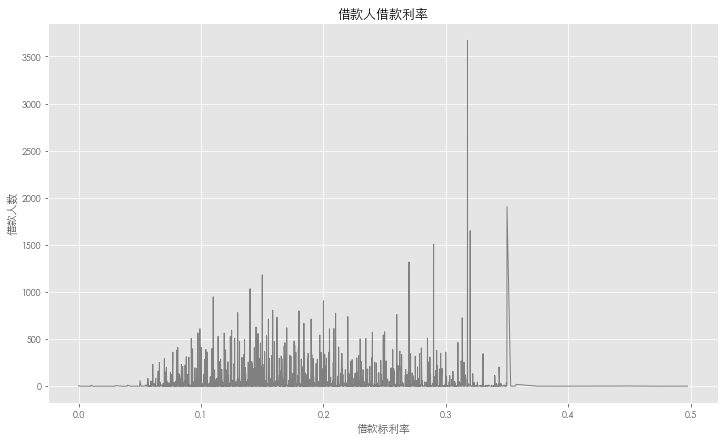

In [18]:
#对借款人利率数据进行可视化展示
data_P2P_BorrowerRate=data_P2P.groupby('BorrowerRate')['BorrowerRate'].count()
plt.figure(figsize=(12,7))
plt.plot(data_P2P_BorrowerRate.index,data_P2P_BorrowerRate,'g-',color='gray',linewidth=1)
plt.xlabel('借款标利率')
plt.ylabel('借款人数')
plt.title('借款人借款利率')
plt.show()

从上图可以看出：平台上的***借款利率多集中在0.08至0.25这个区间***，另外，利率0.32附近也拥有大量的观测值。并且***贷款利率似乎与贷款期限关系并不明显，未如经验判断的“期限越长、利率越高”***。

### 11、风险评级和风险评分

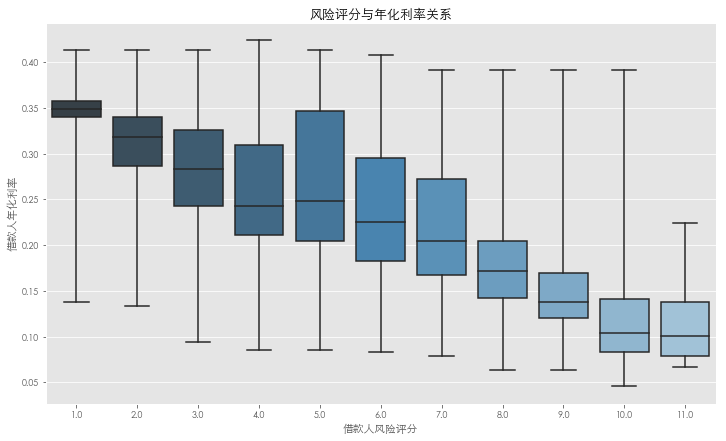

In [19]:
#对风险评分和风险评级数据进行可视化展示
import seaborn as sns
ax4=plt.subplots(figsize=(12,7))
plt.title(u'风险评分与年化利率关系')
ax4 = sns.boxplot(x="ProsperScore", y="BorrowerAPR",data=data_P2P,whis=np.inf,palette="Blues_d")
plt.xlabel('借款人风险评分')
plt.ylabel('借款人年化利率')
plt.show()

In [20]:
corr_PB=data_P2P["ProsperScore"].corr(data_P2P["BorrowerAPR"]) #计算风险评分与借款人年化利率之间的皮尔森相关系数
corr_PB

-0.66828719689226712

从上图可以看出：***借款人的风险评分越高，借款的年化利率越低***，这两个特征之间的相关系数为-0.668287，说明这两个特征之间有一定的关系。

### 12、风险评分和负债收入比

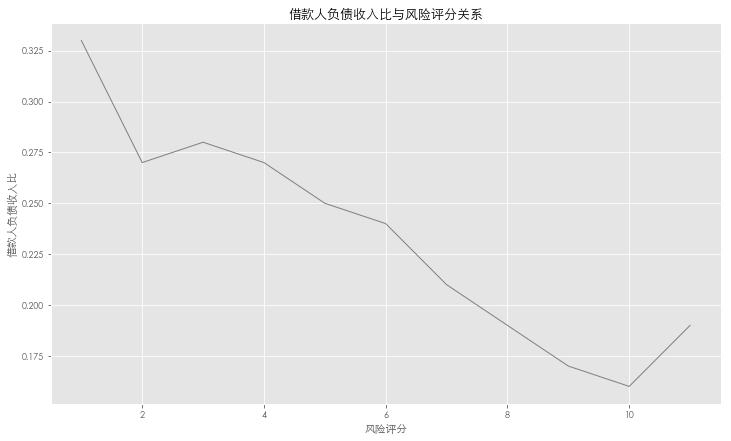

In [21]:
#对风险评分和负债收入比数据进行可视化展示
data_P2P_PD=data_P2P.groupby('ProsperScore')['DebtToIncomeRatio'].median()
plt.figure(figsize=(12,7))
plt.plot(data_P2P_PD.index,data_P2P_PD,'g-',color='gray',linewidth=1)
plt.xlabel('风险评分')
plt.ylabel('借款人负债收入比')
plt.title('借款人负债收入比与风险评分关系')
plt.show()


In [22]:
corr_PD=data_P2P["DebtToIncomeRatio"].corr(data_P2P["ProsperScore"])#计算借款人负债收入比与评分之间的皮尔森相关系数
corr_PD

-0.14533589210024561

从上图可以看出：***借款人负债收入比越高，一般风险评分给出的分数越低***，这两个特征之间的相关系数只有-0.145335，它们没有实质性的关系。

### 13、风险评分和信用卡已用额度占比

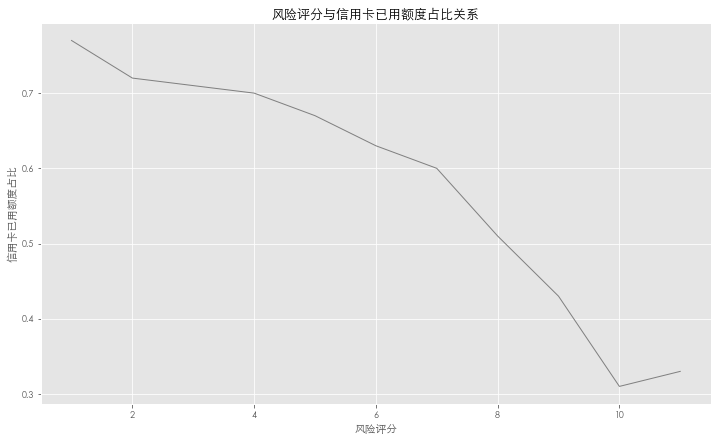

In [23]:
#对风险评分和信用卡已用额度占比数据进行可视化展示
data_P2P_PBU=data_P2P.groupby('ProsperScore')['BankcardUtilization'].median()
plt.figure(figsize=(12,7))
plt.plot(data_P2P_PBU.index,data_P2P_PBU,'g-',color='gray',linewidth=1)
plt.xlabel('风险评分')
plt.ylabel('信用卡已用额度占比')
plt.title('风险评分与信用卡已用额度占比关系')
plt.show()

In [24]:
corr_PBU=data_P2P["BankcardUtilization"].corr(data_P2P["ProsperScore"]) #计算风险评分与借款人信用卡已用额度占比的皮尔森相关系数
corr_PBU

-0.24469557044217263

从上图可以看出：***借款人信用卡已用额度占比越高，一般风险评分给出的分数越低***。但是这两个特征的皮尔逊相关系数只有-0.2445，没有什么实质性的关系。

### 14、风险评级与借款年化利率

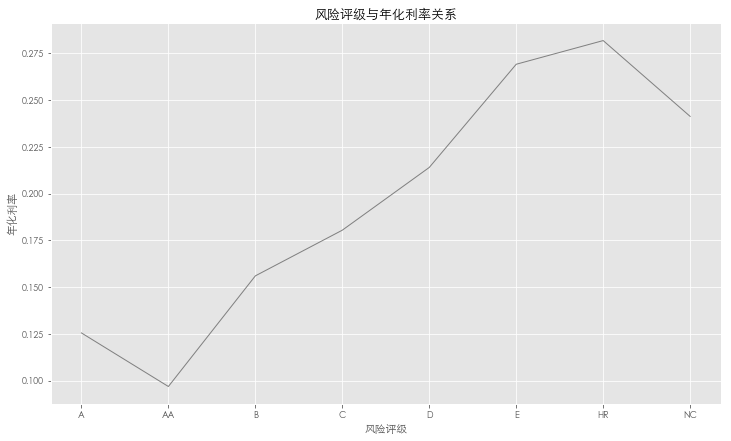

In [25]:
#对风险评级与借款年化利率数据进行可视化展示
data_P2P_BC=data_P2P.groupby('CreditGrade')['BorrowerAPR'].median()
plt.figure(figsize=(12,7))
plt.plot(data_P2P_BC.index,data_P2P_BC,'g-',color='gray',linewidth=1)
plt.xlabel('风险评级')
plt.ylabel('年化利率')
plt.title('风险评级与年化利率关系')
plt.show()

从上图可以看出：***借款人风险评级的等级越高其年化利率越低***，很有可能是因为年化利率是根据风险评级而定的。

### 15、风险评分与最近职业持续月数

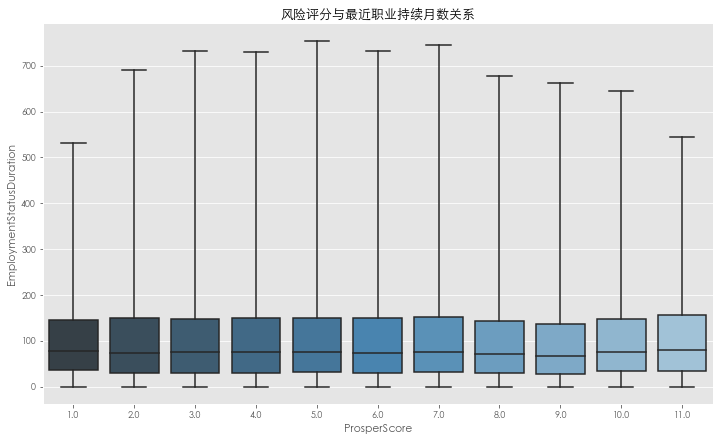

In [26]:
#对风险评分与最近职业持续月数数据进行可视化展示
ax4=plt.subplots(figsize=(12,7))
plt.xlabel('风险评分')
plt.ylabel('最近职业持续月数')
plt.title(u'风险评分与最近职业持续月数关系')
ax4 = sns.boxplot(x=data_P2P['ProsperScore'], y=data_P2P['EmploymentStatusDuration'], data=data_P2P,whis=np.inf,palette="Blues_d")
plt.show()

In [27]:
corr_PE=data_P2P["ProsperScore"].corr(data_P2P["EmploymentStatusDuration"]) #计算风险评分与最近职业持续月数的皮尔森相关系数
corr_PE

-0.0073021085430853673

从上图可以看出：风险评分在10分以上的借款人当前职业状态持续月数的中位数，比其它分值的要稍微高一点点。这两个特征的皮尔逊相关系数是-0.0073，说明这两个特征之间没有什么实质性关系。

### 结论

通过以上分析可以得出以下几个结论：

1. 该平台借款人主要分布在美国经济较繁荣的地区，并且借款人收入相对较高，资金状况也比较良好，反映出该平台稳定性比较高。如果该平台在今后扩大规模时首先应该考虑在经济相对发达的地区设立分部，这样有利于平台发展。
2. 该平台通过通过风险分散化，将投资人的损失降到最低限度，这是该平台受到投资人青睐的原因之一。
3. 通过分析发现借款年化利息与风险评级之间、风险评级与风险评分之间有强相关性。这与我们的业务知识相一致，我们都知道借款年化利息是根据风险评级的高低定的，而风险评级又是根据风险评分定的。 
4. 通过分析得出该平台风险评分越高其借款利率越低，这样平台贷款时根据贷款人的风险评分给出相应的年化利率获取回报。
5. 一般认为借款人信征数据近期被查询的次数越高这个人就越有可能违约，平台通过这个数据可以规避这种情况。
6. 从上述分析可以看出风险评分特征与很多特征都有相关性，平台在受理借款时应该更多地关注借款人的风险评分，投资人应该在了解借款人风险评分后决定是否投资，降低平台及投资人的损失。
7. 我们知道风险评级是基于风险评分生成的，借款的年化利率又是根据风险评级定的，这两个特征虽然都与风险评分有着较强的相关性，但是因为是先有的风险评分，再有的风险评级，最后才有的年化利率，所以无法使用这两个特征去预测风险评分。